# Sweet NumPy

## Contents

- [Imports](#section1)
- [Array-Representation of Data](#section2)
- [The Basics of NumPy Arrays](#section3)
    - [Introduction to NumPy arrays](#subsection3.1)
    - [Create NumPy arrays](#subsection3.2)
    - [Indexing and slicing of arrays](#subsection3.3)
- [Array Operations](#section4)
    - [Vectorized operations](#subsection4.1)
    - [Broadcasting](#subsection4.2)
    - [Functions and array methods](#subsection4.3)


## Imports <a id="section1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Array-Representation of Data <a id="section2"></a>

In computer science, an array data structure, or simply an **array**, is a data structure consisting of a collection of elements (values or variables). These elements can be accessed via array indexes or keys. Apparently, compound data types like `range`, `list`, `tuple`, and `dict` fall into this category and in Python they are also referred to as **array-like** objects. For other data types, like `int`, `float`, `bool`, each object has only a single value. These data types are referred to as **scalars**.

The table below is an example of a **one-dimensional** array which represents the stock price of Amazon (AMZN) in six days. 

|0|1|2|3|4|5|
|---:|---:|---:|---:|---:|---:|
|170.40| 167.52| 164.36| 163.25| 162.55| 161.49|


The characteristics of one-dimensional arrays are summarized as follows:
- The shape of the array is determined by the length, which is six.
- The number of data items in the array is the same as the length.
- Data items in the array can be accessed by one integer index or one slicing expression. 

Such a data array structure can be extended to a **two-dimensional** case. The table below is a two-dimensional array, which shows the stock prices of Amazon, Google, and Tesla in six days. 

| |0|1|2|
---:|---:|---:|---:|
**0**|170.40|2901.49|1199.78|
**1**|167.52|2888.33|1149.59|
**2**|164.36|2753.07|1088.12|
**3**|163.36|2751.02|1064.70|
**4**|162.55|2740.09|1026.96|
**5**|161.49|2771.48|1058.12|

Similar to the one-dimensional case, the characteristics of two-dimensional arrays are:
- The shape of the array is indicated by the row number and column number of the array.
- The number of data items is expressed as the row number times the column number. 
- Data items in the array are accessed by the row indexes and the column indexes. 

From these two examples, we generalize the features of an N-dimensional array below.

|Dimension Number | Shape | Indexing | Number of Items |
|:----|:------|:------|:-----|
| 1 | length | one index | length |
| 2 | rows and columns | row index and column index | row $\times$ column |
| 3 | height and width and thickness | indexes for height, width, and thickness | height $\times$ width $\times$ thickness |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$|

The structure of an N-dimensional array can be summarized as:
- The shape of the array is expressed as N integers. 
- The number of data items is calculated as the product of all dimension integers. 
- Data items in the array are accessed by N indexes. 

Please note that these N dimensions are also referred to as N **axes**, so they are named as axis 0, axis 1, axis 2, ..., as shown by the graph below. 

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays.png" width=500>

## The Basics of NumPy Arrays <a id="section3"></a>

### Introduction to NumPy arrays <a id="subsection3.1"></a>
NumPy (short for Numerical Python) is a widely used package for scientific computing and it provides
a data type called `numpy.ndarray` to efficiently store and operate data formatted as arrays of any dimension. 

Data structures like the series and data frames imported from the Pandas package are built on top of NumPy arrays, that is why these arrays are like Pandas data objects with their labels stripped. 

<div class="alert alert-block alert-success" style='text-height:1.2'>
<b>Example 1:</b> The "stocks2.csv" dataset provides the daily market prices of five stocks in the first six days of 2022. Explore the price data as one and two-dimensional arrays.
</div>

In [2]:
stocks = pd.read_csv('stocks2.csv')
stocks

,AAPL,AMZN,GOOG,TSLA,NFLX
0,181.51,170.40,2901.49,1199.78,597.37
1,179.21,167.52,2888.33,1149.59,591.15
2,174.44,164.36,2753.07,1088.12,567.52
3,171.53,163.25,2751.02,1064.70,553.29
4,171.70,162.55,2740.09,1026.96,541.06
5,171.72,161.49,2771.48,1058.12,539.85


In previous lectures, we learned that a series is a one-dimensional data structure, so here we take one column of the dataset and use the `values` attribute to access the data as a one-dimensional array.

In [3]:
data_1d = stocks['AMZN'].values
data_1d

array([170.4 , 167.52, 164.36, 163.25, 162.55, 161.49])

Similarly, values in the data frame as a two-dimensional data structure can be accessed via the `values` attribute, where the result is a two-dimensional array. 

In [4]:
data_2d = stocks.values
data_2d

array([[ 181.51,  170.4 , 2901.49, 1199.78,  597.37],
       [ 179.21,  167.52, 2888.33, 1149.59,  591.15],
       [ 174.44,  164.36, 2753.07, 1088.12,  567.52],
       [ 171.53,  163.25, 2751.02, 1064.7 ,  553.29],
       [ 171.7 ,  162.55, 2740.09, 1026.96,  541.06],
       [ 171.72,  161.49, 2771.48, 1058.12,  539.85]])

Both arrays are `numpy.ndarray` type objects, as shown by the following code segment. 

In [5]:
print(type(data_1d))
print(type(data_2d))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


It can be seen that a one-dimensional array is similar to a list, while a two-dimensional array has a nested structure that consists of rows and each row is a one-dimensional array. 

We further compare one and two-dimensional arrays according to a few key attributes.

In [6]:
print(f'Array dimensions: {data_1d.ndim}')
print(f'Array shape:      {data_1d.shape}')
print(f'Array size:       {data_1d.size}')
print(f'Array data type:  {data_1d.dtype}')

Array dimensions: 1
Array shape:      (6,)
Array size:       6
Array data type:  float64


In [7]:
print(f'Array dimensions: {data_2d.ndim}')
print(f'Array shape:      {data_2d.shape}')
print(f'Array size:       {data_2d.size}')
print(f'Array data type:  {data_2d.dtype}')

Array dimensions: 2
Array shape:      (6, 5)
Array size:       30
Array data type:  float64


These attributes provide important information on data arrays, in terms of:
- `ndim`: the dimension number of the array.
- `shape`: the shape of the array, given as a tuple.
- `size`: the total number of data items. 
- `dtype`: the data type of all data items. Here, `float64` is almost equivalent to `float`, indicates floating point numbers.

Please note that the NumPy arrays are homogeneous (similar to Pandas series), so the data type `dtype` applies to all data items. 

Also note that the Pandas series and data frames are data structures built on top of NumPy arrays, so the attributes `ndim`, `shape`, and `size` also apply to series and data frames.

In [8]:
print(f'Array dimensions: {stocks["AMZN"].ndim}')
print(f'Array shape:      {stocks["AMZN"].shape}')
print(f'Array size:       {stocks["AMZN"].size}')

Array dimensions: 1
Array shape:      (6,)
Array size:       6


In [9]:
print(f'Array dimensions: {stocks.ndim}')
print(f'Array shape:      {stocks.shape}')
print(f'Array size:       {stocks.size}')

Array dimensions: 2
Array shape:      (6, 5)
Array size:       30


### Create NumPy arrays <a id="subsection3.2"></a>

#### Function `numpy.array()`

NumPy arrays can be created using the `numpy.array()` function from any iterable type objects, such as a list, or a tuple. The following code cell creates a one-dimensional array and a two-dimensional array.

In [10]:
array_1d = np.array([61, 52.5, 71, 32.5, 68, 64])   # This is a 1D array
array_2d = np.array([[18, 26, 17], 
                     [25, 15.5, 12], 
                     [24, 27, 20],
                     [10, 5.5, 17],
                     [27, 26, 15],
                     [22, 21, 21]])                 # This is a 2D array

Note that the two dimensional array is created from a nested list, where each row of the array is represented by each inner list. Check the key attribute below.

In [11]:
print(f'Array dimensions: {array_1d.ndim}')
print(f'Array shape:      {array_1d.shape}')
print(f'Array size:       {array_1d.size}')
print(f'Array data type:  {array_1d.dtype}')

Array dimensions: 1
Array shape:      (6,)
Array size:       6
Array data type:  float64


In [12]:
print(f'Array dimensions: {array_2d.ndim}')
print(f'Array shape:      {array_2d.shape}')
print(f'Array size:       {array_2d.size}')
print(f'Array data type:  {array_2d.dtype}')

Array dimensions: 2
Array shape:      (6, 3)
Array size:       18
Array data type:  float64


#### Arrays of ones and zeros

In some applications, we may want to create arrays with all items to be ones or zeros. Such arrays can be created by the `ones()` and `zeros()` functions imported from the `numpy` package. 

In [13]:
ones_1d = np.ones(5)
ones_1d

array([1., 1., 1., 1., 1.])

In [14]:
zeros_2d = np.zeros((3, 4))
zeros_2d

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

For both functions, we need to use the first argument `shape` to specify the shape of the created array. 

#### Function `arange()`

The `arange()` function imported from the `numpy` package creates sequences of numbers. The `arange()` function is very similar to the `range` function we learned in previous lectures. A sequence of numbers are generated according to the values of the `start`, `stop`, and `step` arguments, and the same default values could be applied to these arguments if they are unspecified. The only differences are 1) the output is an `numpy.ndarray` type object; and 2) numbers in the array could be fractional numbers but the `range` function only allows integers. Check the examples below.

In [15]:
range_array = np.arange(2, 5, 0.5)
range_array

array([2. , 2.5, 3. , 3.5, 4. , 4.5])

The `np.arange()` number sequences are typically used in data visualization. We will discuss such examples in the next section.

### Indexing and slicing of arrays <a id="subsection3.3"></a>

The indexing and slicing of one-dimensional arrays are very similar to Python lists. Check the examples below.

In [16]:
array_1d = np.array([61, 52.5, 71, 32.5, 68, 64])

In [17]:
print(array_1d[1])
print(array_1d[2:])
print(array_1d[::3])

52.5
[71.  32.5 68.  64. ]
[61.  32.5]


For N-dimensional arrays, we need N indexes or slicing expressions in the same brackets separated by commas to access items in the array. Take the two-dimensional array below for example, items in the array are accessed by the row and column indexes. 

In [18]:
array_2d = np.array([[18, 26, 17], 
                     [25, 15.5, 12], 
                     [24, 27, 20],
                     [10, 5.5, 17],
                     [27, 26, 15],
                     [22, 21, 21]])

In [19]:
print(array_2d[3:5, 1:])
print(array_2d[[0, 2, 1], 1:])
print(array_2d[-2:, ::-1])

[[ 5.5 17. ]
 [26.  15. ]]
[[26.  17. ]
 [27.  20. ]
 [15.5 12. ]]
[[15. 26. 27.]
 [21. 21. 22.]]


Note that the NumPy arrays are similar to Pandas data frames: if the column index is not specified, the indexing or slicing expression takes all columns. 

In [20]:
print(array_2d[2:3])

[[24. 27. 20.]]


Besides, NumPy arrays are mutable, so we can change the values of a selected subset of arrays. 

## Array Operations <a id="section4"></a>

### Vectorized operations <a id="subsection4.1"></a>

In previous lectures, we used `for` loops to conduct repeated calculations on data items in an iterable data object. However, this method is hard to read and takes more execution time. The NumPy package provides a convenient interface known as **vectorized operations** for performing repeated operations on all elements in an array without using loops. Check the examples below. 

In [21]:
array_2d = np.array([[1, 2],    
                     [2, 3.5],     
                     [5, 6.5]])

In [22]:
print(array_2d + 3)             # Add one scalar to each element
print(array_2d * 2)             # Each element is multiplied by a scalar
print(array_2d + array_2d)      # Element-wise addition
print(array_2d * array_2d)      # Element-wise multiplication

[[4.  5. ]
 [5.  6.5]
 [8.  9.5]]
[[ 2.  4.]
 [ 4.  7.]
 [10. 13.]]
[[ 2.  4.]
 [ 4.  7.]
 [10. 13.]]
[[ 1.    4.  ]
 [ 4.   12.25]
 [25.   42.25]]


It can be seen that the arithmetic operations are automatically applied to all elements in the given arrays, though no `for` loop is used here. More specifically:
- The calculation between a scalar and an array is equivalent to the calculation between the scalar and each element in the array.
- The calculation between an array and another array is equivalent to element-wise calculation, i.e., calculations between elements at the same position in these two arrays. 

<div class="alert alert-block alert-success" style='text-height:1.2'>
    <b>Example 2:</b> <span style='font-family:Courier'><b>usd</b></span> is a list containing four money transactions in US dollars. Transfer each transaction into Singapore dollars. 
</div>

In [23]:
usd = [2, 3.60, 2.05, 13.50]
exchange_rate = 1.37

Besides using a `for` loop, we could also create an array of money transactions, and then multiply items in the array using vectorized calculation. 

In [24]:
usd_array = np.array(usd)               # Create an array from the list
sgd_array = usd_array * exchange_rate   # Element-wise multiplication

print(sgd_array)

[ 2.74    4.932   2.8085 18.495 ]


Compared with using a `for` loop or list comprehension, as we discussed in previous lectures, using NumPy arrays is:

- More concise;
- Easier to read;
- Faster to execute, especially for arrays with huge number of items.

<div class="alert alert-block alert-success" style='text-height:1.2'>
    <b>Example 3:</b> Use the data file "simpson.csv" to plot the <b>clustered bar chart</b> for the fatality rates of Covid-19 in China and Italy.
</div>

In [25]:
simpson = pd.read_csv('simpson.csv')
simpson

,Age group,China,Italy
0,0-9,0.000000,0.000000
1,Oct-19,0.182149,0.000000
2,20-29,0.193424,0.000000
3,30-39,0.236842,0.000000
4,40-49,0.443356,0.112233
5,50-59,1.298961,0.206469
6,60-69,3.600140,2.515296
7,70-79,7.963247,6.386555
8,80+,14.772727,13.185379
9,total,2.290025,4.448044


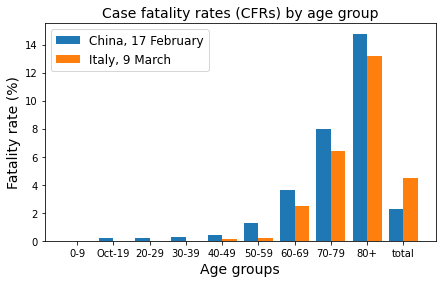

In [26]:
xdata = np.arange(simpson.shape[0])
width = 0.4

plt.figure(figsize=(7, 4))
plt.title('Case fatality rates (CFRs) by age group', fontsize=14)
plt.bar(xdata - width*0.5, simpson['China'], 
        width=width, label='China, 17 February')
plt.bar(xdata + width*0.5, simpson['Italy'], 
        width=width, label='Italy, 9 March')
plt.xticks(xdata, simpson['Age group'])
plt.legend(fontsize=12)
plt.xlabel('Age groups', fontsize=14)
plt.ylabel('Fatality rate (%)', fontsize=14)
plt.show()

The steps for creating the clustered bar chart above:
1. Creating an array of the x-data using the `np.arange()` function.
2. Plot the bar charts for both (or all) groups with proper values of shifts.
3. Replace the numerical x-ticks by an array of labels.

<div class="alert alert-block alert-info" style="text-height:1.2">
    <b>Question 1:</b> Given the two-dimensional array <span style='font-family:Courier'><b>price</b></span>, calculate the daily rate of return of each stock. The daily rate of return is expressed as: <br>
    $$R_{ti} = \frac{p_{ti}-p_{(t-1)i}}{p_{(t-1)i}} \times 100\%,$$
    where the subscript $t$ is index of days, and $i$ is the index of stocks. 
</div>

In [27]:
price = stocks.values
print(price)

[[ 181.51  170.4  2901.49 1199.78  597.37]
 [ 179.21  167.52 2888.33 1149.59  591.15]
 [ 174.44  164.36 2753.07 1088.12  567.52]
 [ 171.53  163.25 2751.02 1064.7   553.29]
 [ 171.7   162.55 2740.09 1026.96  541.06]
 [ 171.72  161.49 2771.48 1058.12  539.85]]


**Solution:**

### Broadcasting <a id="subsection4.2"></a>

In the previous subsection, we have discussed arithmetic operations on 
1. A scalar and an arbitrary shape array;
2. Two arrays with the same shape.

Some special cases of arithmetic operations between arrays with different shapes are allowed in NumPy. Such operations follow the rules referred to as **broadcasting**. You can think broadcasting as to duplicate or to "broadcast" the smaller array across the larger array so that they have compatible shapes, then the element-wise calculations can be conducted. A few examples are given below.

<img src="https://www.astroml.org/_images/fig_broadcast_visual_1.png" width=500pt>

In [28]:
np.arange(3) + 5

array([5, 6, 7])

In [29]:
np.ones((3, 3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [30]:
np.arange(3).reshape((3, 1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Besides the addition operator, the idea of broadcasting can be applied to other arithmetic operators such as multiplication, division, power, etc. 

In the code segment above, the `reshape()` method is used to create a new array with the same element values but different shape. Check the examples below.

In [31]:
x_array = np.arange(10)
print(x_array)
print(x_array.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [32]:
y_array = x_array.reshape((2, 5))
print(y_array)
print(y_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)


Apparently, we need to make sure that the array after reshaping must have the same size (same number of elements) as the one before reshaping, otherwise NumPy raises an error message.

A summary of broadcasting rules:

- If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its **leading (left)** side.
- If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- If in any dimension the shape items disagree and neither is equal to 1, an error is raised.

You may also notice that the operation between a scalar and an array is a special case of broadcasting. 

### Functions and array methods <a id="subsection4.3"></a>

The NumPy package provides many commonly used mathematical functions, such as `exp()` for exponential function, `log()` for natural logarithm, `square()` for squares, `power()` for powers etc. Like the basic arithmetic operations, these functions also work element-wise on arrays, as shown by the following examples.

In [33]:
print(np.log(3))                    # Natural logarithm of 3
print(np.exp(np.arange(1, 3, 0.5))) # Natural exponentials of 1, 1.5, 2, 2.5
print(np.square(np.arange(3)))      # Squares of 0, 1, 2
print(np.power(2, np.arange(3)))    # 2 to the power of 0, 1, 2

1.0986122886681098
[ 2.71828183  4.48168907  7.3890561  12.18249396]
[0 1 4]
[1 2 4]


<div class="alert alert-block alert-info">
<b>Question 2:</b> It is shown in the paper <b><i>Drawing an elephant with four complex parameters</i></b> that we can draw an elephant according to the following equations,
$$
\begin{cases}
x = -30\sin(t) + 8\sin(2t) - 10\sin(3t) - 60\cos(t) \\
y = -50\sin(t) - 18\sin(2t) - 12\cos(3t) + 14\cos(5t)
\end{cases}
$$
where $t$ is an array of numbers continuously changing from 0 to 2$\pi$. Draw an elephant according to the equations above. 
</div>

**Solution:**

Similar to other Python data types, there are also many methods associated with NumPy arrays. Frequently used ones are:
- Method `sum()` for calculating the summation of items.
- Method `max()`/`min()` for identifying the maximum/minimum items in the array.
- Method `mean()` for calculating the mean of item values. 
- Method `var()`/`std()` for calculating the variance/standard deviation. 

Please note that unlike the `var()`/`std()` method of Pandas series or data frame objects that calculate the **sample** variance/standard deviation by default, the NumPy version of `var()`/`std()` method calculates the **population** variance/standard deviation by default. The difference between the two will be discussed in **Lecture 11**.

In [34]:
array_2d = np.array([[1, 2],    
                     [2, 3.5],     
                     [5, 6.5]])

print(array_2d.sum())          # Sum of all items
print(array_2d.max())          # The maximum item in the array
print(array_2d.min())          # The minimum item in the array
print(array_2d.mean())         # The average of all numbers

20.0
6.5
1.0
3.3333333333333335


Besides calculations on all items in the array (default case), we can also specify an axis along which these measures are calculated. Some examples are given as follows.

In [35]:
array_2d = np.array([[1, 2],    
                     [2, 3.5],     
                     [5, 6.5]])

print(array_2d.sum(axis=0))    # For each column, sum of elements along rows
print(array_2d.sum(axis=1))    # For each row, sum of elements along columns
print(array_2d.max(axis=0))    # The maximum elements of each column (along rows)
print(array_2d.min(axis=1))    # The minimum elements of each row (along columns)

[ 8. 12.]
[ 3.   5.5 11.5]
[5.  6.5]
[1. 2. 5.]


<div class="alert alert-block alert-success" style='text-height:1.2'>
    <b>Example 4:</b> Given the two-dimensional array <span style='font-family:Courier'><b>price</b></span>, calculate the average price and <b>range</b> of each stock. The range is expressed as the distance between the maximum and minimum values.
</div>

In [36]:
price = stocks.values
print(price)

[[ 181.51  170.4  2901.49 1199.78  597.37]
 [ 179.21  167.52 2888.33 1149.59  591.15]
 [ 174.44  164.36 2753.07 1088.12  567.52]
 [ 171.53  163.25 2751.02 1064.7   553.29]
 [ 171.7   162.55 2740.09 1026.96  541.06]
 [ 171.72  161.49 2771.48 1058.12  539.85]]


In [37]:
avg_price = price.mean(axis=0)
print(avg_price)

[ 175.01833333  164.92833333 2800.91333333 1097.87833333  565.04      ]


In [38]:
range_price = price.max(axis=0) - price.min(axis=0)
print(range_price)

[  9.98   8.91 161.4  172.82  57.52]
